<a href="https://colab.research.google.com/github/Ayushkrn7781/Ayushkrn/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 1 - CodeRunner: Regression Rumble

Gradient Decent algorithm is used to optimise our model parameters.

The main idea is that we propagate opposite the direction of the gradient of the cost function at a given hyper parameter w or b.

To understand better, let us get our hands dirty! Below is the code implemented for the linear regression algorithm.

* We generate a regression data using the skikit_learns inbuilt library.
* We generate random weight matrices using the np.random.randn function
* Apply the GD Algorithm
 * Calculate the output of the model.
 * Calculate the error. (Used in the MSE Cost function)
 * Compute the gradient of the Cost function wrt our hyperparameter.
 * Update theta.

Have a look at the code below and fill in the necessary blanks "..."

Note:- Use the Mean Square error as your cost function given as:

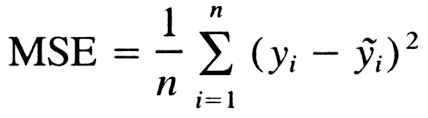

ybar is the predicted output.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# sklearn.datasets.make_regression is a function in scikit-learn that generates
# a random regression dataset with specified parameters, such as the number of
# samples, number of features, and level of noise.

X, y = make_regression(n_samples=100, n_features=1, noise=10)


In [8]:
def gradient_descent(X, y, learning_rate, num_iterations):
    # Initialize parameter theta (our weight matrix)
    #Use the np.random.randn function for the same.
    theta = np.random.randn(1)


    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted values:
        predictions =np.dot(X,theta)

        # Calculate the error: use the mse function
        error = np.mean((y-predictions)**2)
        # Calculate the gradients: 1/m * X.T * error
        gradients = (-2/m) * X.T.dot(y - predictions)
        # Update parameters: Apply the GD algorithm
        theta -=learning_rate*gradients

        # Calculate the cost function: MSE
        cost = np.mean((y - predictions)**2)

        cost_history.append(cost)

    return theta, cost_history


In [9]:
# Set the learning rate and number of iterations
learning_rate = 0.01
num_iterations = 1000



# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(X, y, learning_rate, num_iterations)


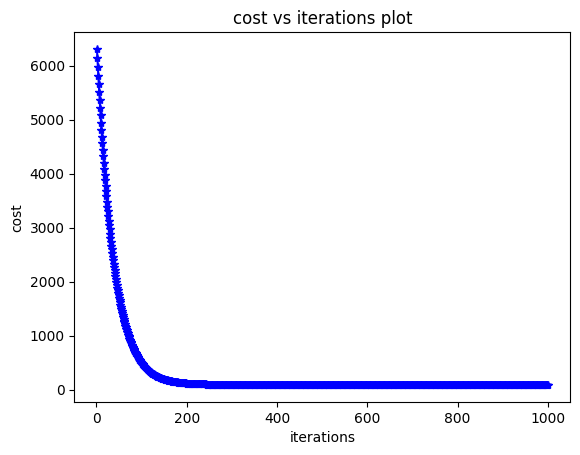

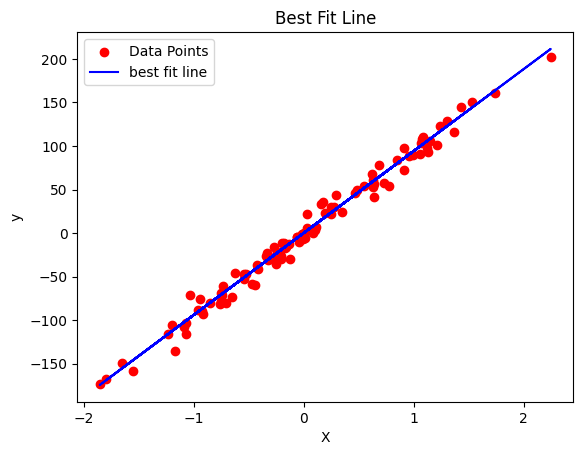

In [10]:
# Plot the cost function over iterations
plt.plot(range(1, num_iterations + 1), cost_history, marker='*', color='b')
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("cost vs iterations plot")
plt.show()

# Plot the best fit line
plt.scatter(X, y, color='red', label='Data Points')
plt.plot(X, np.dot(X,theta), color='blue',label='best fit line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Best Fit Line')
plt.legend()
plt.show()

##Question 2 - CodeRunner: Regression Rumble II

The Logistic Regression algorithm is similar to Linear Regression minus the introdiction of a sigmoid activation function.

We also use the Binary Cross Entropy Cost function istead of MSE.

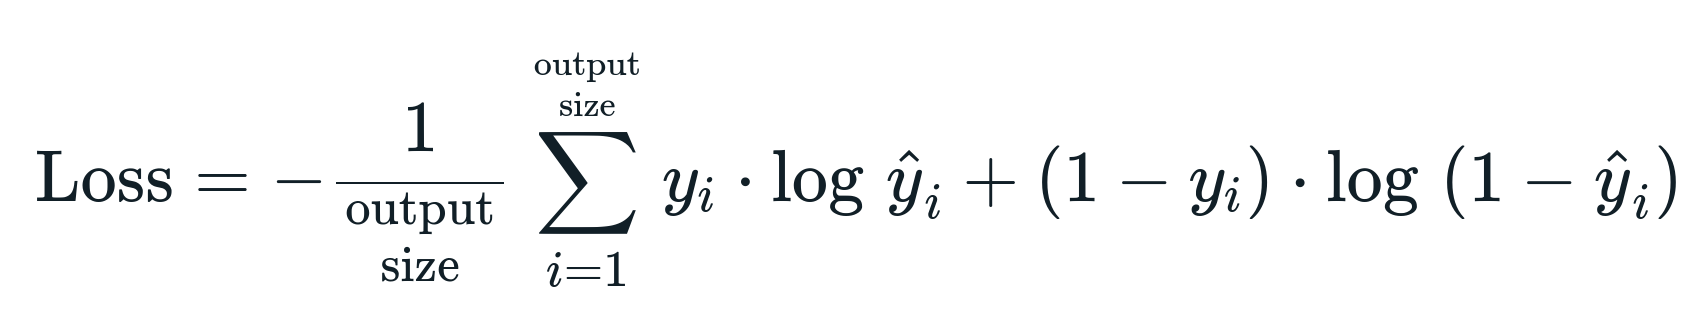


In [12]:
# Generate random classification data using scikit-learn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)


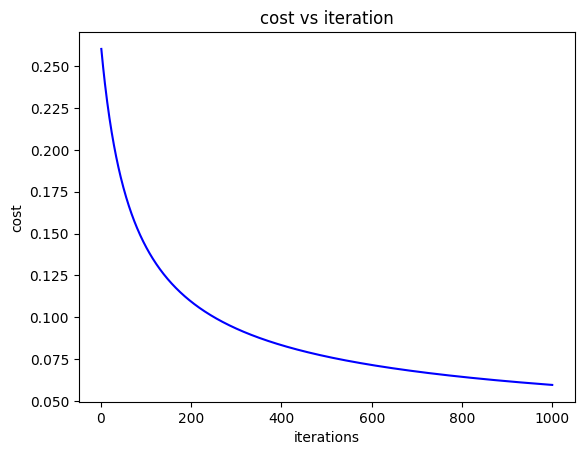

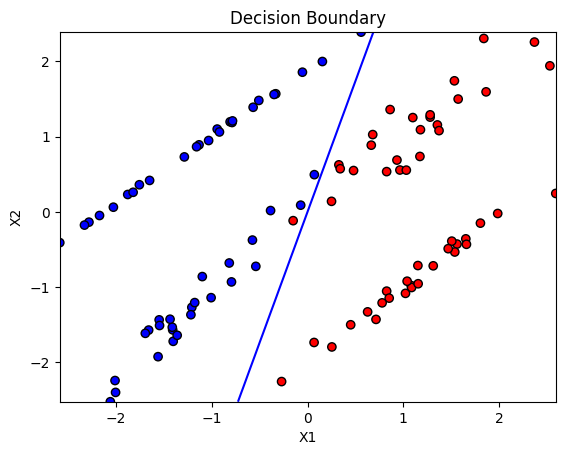

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def sigmoid(z):
    # Sigmoid function
    return 1/(1+np.exp(-z))

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initialize parameters: theta
    theta=np.random.randn(2)


    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate predicted probabilities using the sigmoid function.
        predictions = np.dot(X,theta)
        y_pred=sigmoid(predictions)
        epsilon=np.exp(-15)

        # Calculate the error: y_pred - y
        error = (-1/m)*sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))

        # Calculate the gradients:
        gradients = np.dot(X.T, y_pred - y) / m

        # Update parameters:
        theta -= learning_rate*gradients.reshape(2,)

        # Calculate the cost function: log loss
        cost = (-1/m)*sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        cost_history.append(cost)

    return theta, cost_history
#print(cost_history)
# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Set the learning rate and number of iterations
learning_rate = 0.1
num_iterations = 1000

# Call the logistic_regression function and store the results
theta, cost_history = logistic_regression(X, y, learning_rate, num_iterations)

# Plot the cost function over iterations

plt.plot(range(1,num_iterations+1),cost_history,color='b')
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('cost vs iteration')
plt.show()
# Plot the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sigmoid(np.dot(grid, theta)).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0.5], colors='blue')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Decision Boundary')
plt.show()